In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time
import torch
import numpy as np
import random

# torch.manual_seed(111)
# torch.cuda.manual_seed(111)
# np.random.seed(111)
# random.seed(111)
# torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

In [3]:
ncc = 2
n_epochs = 5
bn_size = 500

In [4]:

start_time = time.time()
%run autoenc_br.py --epochs {n_epochs} --connected_components {ncc} --dataset colmnist --regularizer svd --bn_size {bn_size} --n_workers 0
print("--- %s seconds ---" % (time.time() - start_time))
#torch.save(trainer.model, "colmnist_disent_100.pt")

Batch 1, training loss 0.2920, val loss 0.2767, block_reg 0.96, dropout rate 0.50
Pruned to 499 neurons
Batch 101, training loss 0.0629, val loss 0.0667, block_reg 0.95, dropout rate 0.50
Batch 201, training loss 0.0538, val loss 0.0502, block_reg 0.94, dropout rate 0.50
Pruned to 498 neurons
Batch 301, training loss 0.0431, val loss 0.0449, block_reg 0.93, dropout rate 0.50
Batch 401, training loss 0.0341, val loss 0.0353, block_reg 0.92, dropout rate 0.50
Pruned to 497 neurons
Batch 501, training loss 0.0335, val loss 0.0324, block_reg 0.91, dropout rate 0.50
Batch 601, training loss 0.0308, val loss 0.0311, block_reg 0.91, dropout rate 0.50
Batch 701, training loss 0.0274, val loss 0.0288, block_reg 0.90, dropout rate 0.50
Pruned to 496 neurons
Batch 801, training loss 0.0255, val loss 0.0269, block_reg 0.89, dropout rate 0.50
Batch 901, training loss 0.0242, val loss 0.0238, block_reg 0.89, dropout rate 0.50
Pruned to 495 neurons
Batch 1001, training loss 0.0233, val loss 0.0223, b

Batch 901, training loss 0.0118, val loss 0.0119, block_reg 0.81, dropout rate 0.50
Pruned to 459 neurons
Batch 1001, training loss 0.0114, val loss 0.0102, block_reg 0.81, dropout rate 0.50
Batch 1101, training loss 0.0145, val loss 0.0170, block_reg 0.81, dropout rate 0.50
Pruned to 458 neurons
Batch 1201, training loss 0.0119, val loss 0.0103, block_reg 0.80, dropout rate 0.50
Batch 1301, training loss 0.0126, val loss 0.0099, block_reg 0.80, dropout rate 0.50
Batch 1401, training loss 0.0111, val loss 0.0101, block_reg 0.80, dropout rate 0.50
Pruned to 457 neurons
Batch 1501, training loss 0.0117, val loss 0.0111, block_reg 0.80, dropout rate 0.50
Batch 1601, training loss 0.0115, val loss 0.0112, block_reg 0.80, dropout rate 0.50
Pruned to 456 neurons
Batch 1701, training loss 0.0112, val loss 0.0109, block_reg 0.80, dropout rate 0.50
Batch 1801, training loss 0.0114, val loss 0.0110, block_reg 0.80, dropout rate 0.50
Pruned to 455 neurons
Train epoch 5, loss 0.011528799437483151


In [5]:
# start_time = time.time()
# %run autoenc_baseline.py --epochs {n_epochs} --dataset colmnist --bn_size {bn_size} --n_workers 0
# print("--- %s seconds ---" % (time.time() - start_time))
# torch.save(trainer.model, "colmnist_not_disent.pt")

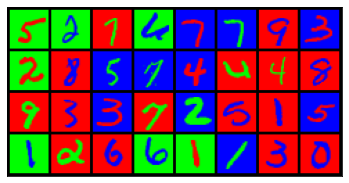

Image shape: torch.Size([3, 28, 28])


In [6]:
from plotting_utils import show_dataset_examples
show_dataset_examples(trainer)

In [7]:
from plotting_utils import get_test_sample
test_examples = get_test_sample(trainer)

In [8]:
(len(trainer.train_loader)/trainer.batch_size)

58.59375

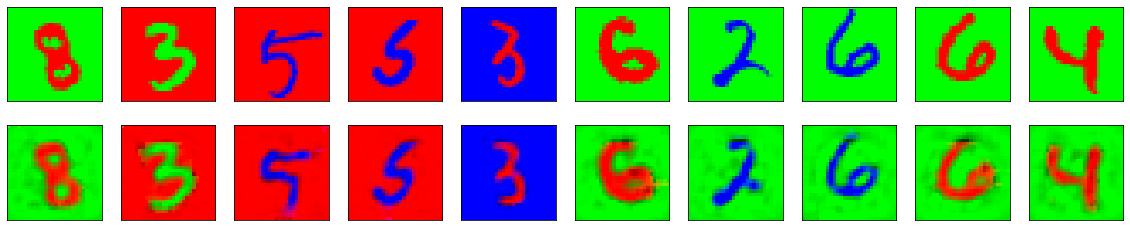

In [9]:
from plotting_utils import show_reconstruction
show_reconstruction(test_examples, trainer)

In [10]:
ncc = 2

In [11]:
from models import block_regularizer
block_regularizer(trainer.model.encoder_output_layer, ncc)

tensor(0.8037, device='cuda:0', grad_fn=<RsubBackward1>)

In [12]:
from models import layer_svd
import matplotlib.pyplot as plt

enc_layer = trainer.model.encoder_output_layer
u, s, v = layer_svd(enc_layer)
u = u.detach().cpu().numpy()
s = s.detach().cpu().numpy()
v = v.detach().cpu().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(u[:, :ncc].transpose(1, 0), cmap="magma")

In [13]:
from models import compute_layer_blocks_out, compute_layer_blocks_in
blocks = compute_layer_blocks_out(enc_layer, ncc)
len(blocks)
print(blocks)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  1,  1,  1, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,
         0,  0,  1,  1, -1,  1,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0, -1,  0,
         0,  0,  0,  1,  0,  0,  1,  0,  1,  1,  0,  0, -1,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
         0,  0,  1,  0,  1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  1,  0,
         1,  1,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,
         0,  1,  0,  1,  0,  0,  0,  0, 

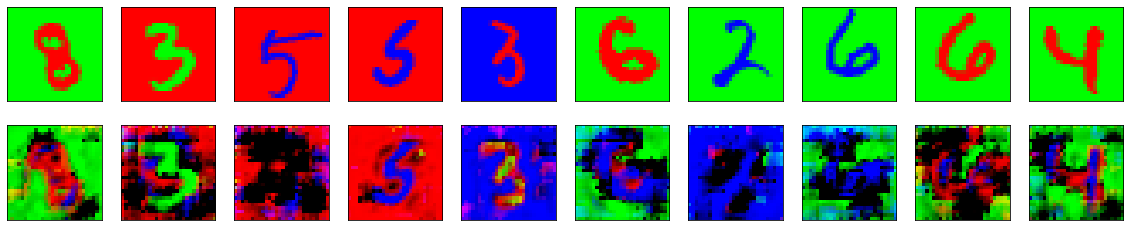

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, False,  True,
         True, False, False, False, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True, False,  True, False,  True,
         True,  True,  True,  True,  True,  True, False, False,  True,  True,
         True,  True,  True,  True, False, False, False, False,  True,  True,
         True,  True,  True, False,  True,  True, False,  True, False,  True,
         True,  True,  True, False,  True,  True, False,  True, False, False,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, 

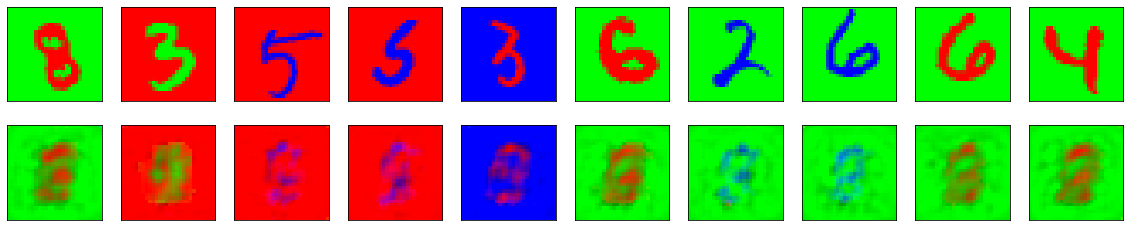

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False,  True,  True,  True, False, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False,  True,  True, False,  True, False, False,
        False, False, False,  True, False, False,  True, False, False, False,
        False, False, False,  True, False, False,  True, False,  True,  True,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False,  True, 

In [14]:
from plotting_utils import plot_reconstruction

for c in range(max(blocks)+1):
    plt.figure(figsize=(20, 20)) 
    plt.imshow([blocks.numpy()==c], cmap='magma')
    enc_layer.turn_output_neurons_off(blocks==c)
    
    show_reconstruction(test_examples, trainer)
    
    print(enc_layer.out_mask)
    enc_layer.turn_all_output_neurons_on()

In [15]:
trainer.model

AE(
  (encoder_0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (encoder_1): Sequential(
    (0): ReLU(inplace=True)
    (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU(inplace=True)
  )
  (encoder_hidden_layer): Linear(in_features=6400, out_features=1024, bias=True)
  (encoder_output_layer): DisentangledLinear(in_features=1024, out_features=500, bias=True)
  (block_dropout_1): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=1024, out_features=500, bias=True)
  )
  (decoder_hidden_layer): DisentangledLinear(in_features=500, out_features=1024, bias=True)
  (block_dropout_2): BlockDropout(
    p=0.5, inplace=False
    (layer): DisentangledLinear(in_features=500, out_features=1024, bias=True)
  )
  (decoder_output_layer): Linear(in_features=1024, out_features=6400, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kerne

In [16]:

def plot_blocked_weights(layer):
    plt.figure(figsize=(20, 7))
    blocks_in = compute_layer_blocks_in(layer, ncc)
    blocks_out = compute_layer_blocks_out(layer, ncc)
    plt.imshow(layer.weight[np.argsort(blocks_out)][:, np.argsort(blocks_in)].cpu().detach().numpy(), cmap='magma')
    plt.show()


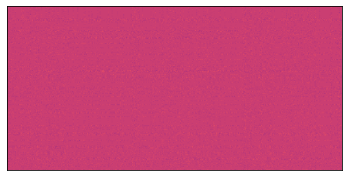

In [17]:
new_weight = np.zeros(enc_layer.weight.shape)
blocks_out = compute_layer_blocks_out(enc_layer, ncc)
blocks_in = compute_layer_blocks_in(enc_layer, ncc)
for i in range(ncc):
    mask = np.ones(enc_layer.weight.shape, dtype=bool)
    mask[blocks_out!=i] = 0
    mask[:, blocks_in!=i] = 0
    new_weight[mask] = enc_layer.weight.detach().cpu()[mask]
    
plt.imshow(new_weight, cmap='magma')

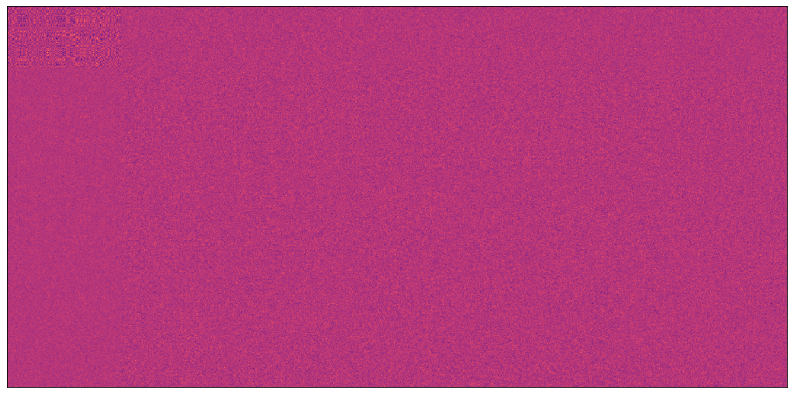

In [18]:
plot_blocked_weights(enc_layer)

In [19]:
enc_layer.weight = nn.Parameter(torch.tensor(new_weight).cuda().float())

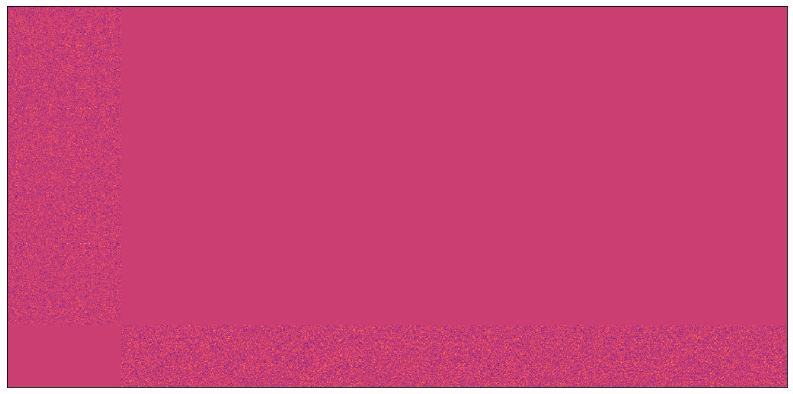

In [20]:
plot_blocked_weights(enc_layer)

In [21]:
np.where(blocks==0)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  45,
         46,  47,  49,  50,  51,  52,  53,  54,  55,  57,  59,  60,  61,
         62,  63,  64,  65,  68,  69,  70,  71,  72,  73,  78,  79,  80,
         81,  82,  84,  85,  87,  89,  90,  91,  92,  94,  95,  97, 100,
        101, 103, 104, 105, 106, 107, 108, 109, 111, 112, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145,
        147, 149, 150, 151, 152, 155, 156, 157, 158, 159, 160, 161, 162,
        164, 165, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178,
        179, 181, 182, 183, 185, 186, 187, 188, 189, 190, 193, 194, 195,
        197, 200, 202, 203, 204, 205, 206, 207, 209, 210, 211, 212, 214,
        215, 216, 218, 220, 221, 222, 223, 226, 227

In [22]:
for c in range(ncc):
    print("block {}".format(c))
    for n in np.where(blocks==c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[n] = 1
        print(n)
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        print(trainer.criterion(test_examples, reconstruction))
        enc_layer.turn_all_output_neurons_on()

block 0
0


RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:
relative_error = [None]*bn_size
for c in range(ncc):
    mask = torch.zeros(60, dtype=torch.float)
    mask[blocks==c] = 1
    enc_layer.turn_output_neurons_off(mask)
    with torch.no_grad():
        reconstruction = trainer.model(test_examples)
    block_error = trainer.criterion(test_examples, reconstruction).item()
    enc_layer.turn_all_output_neurons_on()
        
    #print("block {}".format(c))
    for n in np.where(blocks!=c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[blocks==c] = 1
        mask[n] = 1
        #print(n)
        #plt.figure(figsize=(20, 20)) 
        #plt.imshow(mask.unsqueeze(0), cmap='magma')
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        #plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        relative_error[n] = block_error - trainer.criterion(test_examples, reconstruction).item()
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error

In [ ]:

plt.figure()
plt.hist(np.array(relative_error)[blocks==0])
plt.figure()
plt.hist(np.array(relative_error)[blocks==1])
thr = np.percentile(np.array(relative_error), 20)
re_mask = np.array([e>thr for e in relative_error])
re_mask.sum()

In [ ]:
for c in range(ncc):
    mask = np.logical_and(np.array(blocks==c), re_mask)
    plt.figure(figsize=(20, 20)) 
    plt.imshow(torch.tensor(mask).unsqueeze(0), cmap='magma')
    enc_layer.turn_output_neurons_off(mask)
    
    show_reconstruction(test_examples, trainer)
    enc_layer.turn_all_output_neurons_on()

In [ ]:
srt_enc = np.argsort(v.transpose(1, 0)[:, 1]).tolist()
srt_hidden = np.argsort(u.transpose(1, 0)[:, 1]).tolist()

trainer.model.set_mask(None)

w1 = trainer.model.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]


In [ ]:
srt_enc

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [ ]:
binned_examples = [[[] for _ in range(3)] for _ in range(10)]
for batch_features in trainer.test_loader:
    batch_features, (digit, _, clr) = batch_features
    for i in range(len(batch_features)):
        binned_examples[digit[i].item()][clr[i].item()].append(batch_features[i].to(device))

In [ ]:
for d in range(10):
    for clr in range(3):
        binned_examples[d][clr] = torch.stack(binned_examples[d][clr]).to(device)
        print(binned_examples[d][clr].shape)

In [ ]:
losses = []
for _ in range(ncc):
    losses.append(torch.zeros((3, 10)))
    
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    for clr in range(3):
        for d in range(10):
            with torch.no_grad():
                reconstruction = trainer.model(binned_examples[d][clr]).cpu()
            show_reconstruction(binned_examples[d][clr], reconstruction)
            losses[c][clr][d] = trainer.criterion(binned_examples[d][clr], reconstruction.cuda())

In [ ]:

for c in range(ncc):
    plt.grid(False)
    plt.imshow(losses[c], cmap="magma")
    plt.show()
    print(losses[c])

           

In [ ]:
print(losses[0].sum(0))
print(losses[0].sum(1))
print(losses[1].sum(0))
print(losses[1].sum(1))

In [ ]:
def block_dropout(blocks, prob):
    mask = torch.zeros(len(blocks), dtype=torch.bool)
    first_mask = torch.rand(((blocks==0).sum(), )) < prob
    mask[blocks==0] = first_mask
    p = first_mask.sum()/len(first_mask)
    for i in range(1, max(blocks)+1):
        new_mask = torch.zeros(((blocks==i).sum(), ), dtype=torch.bool)
        new_mask[:int(p*len(new_mask))] = 1
        mask[blocks==i] = new_mask[torch.randperm(len(new_mask))]

    return mask.float()

block_dropout(blocks, 0.2)

In [ ]:
b_test = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
for i in range(20):
    d = block_dropout(b_test, 0.3)
    print(d[:8].sum().item(), d[8:].sum().item())
    print(d)

# T-SNE

In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
embeddings = []
targets = []
d_targets = []
c_targets = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features.cuda()).cpu()
        embeddings.append(trainer.model.embedding)
        d_targets.extend(digit.tolist())
        c_targets.extend(clr.tolist())
        #targets.extend([str(d)+"_"+str(c) for d, c in zip(digit.tolist(), clr.tolist())])

In [ ]:
df_emb = torch.vstack(embeddings).detach().cpu().numpy()
targets = [c*10+d for d, c in zip(d_targets, c_targets)]

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
fashion_scatter(tsne_results, np.array(targets))


In [ ]:
fashion_scatter(tsne_results, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results, np.array(d_targets))

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_block0 = tsne.fit_transform(df_emb[:, blocks==0])
tsne_results_block1 = tsne.fit_transform(df_emb[:, blocks==1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
fashion_scatter(tsne_results_block0, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results_block0, np.array(d_targets))

In [ ]:
fashion_scatter(tsne_results_block1, np.array(c_targets))

In [ ]:
fashion_scatter(tsne_results_block1, np.array(d_targets))

# Dependencies between blocks

In [ ]:
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==0].transpose(1, 0)))
plt.colorbar()

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==1].transpose(1, 0)))
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
dist = np.zeros((bn_size, bn_size))
for i in range(bn_size):
    for j in range(i, bn_size):
        dist[i, j] = np.abs(full_corr[i]-full_corr[j]).sum()
        dist[j, i] = np.abs(full_corr[i]-full_corr[j]).sum()
        
plt.figure(figsize=(20, 20)) 
plt.imshow(dist<5)
plt.colorbar()

plt.figure(figsize=(20, 20)) 
plt.hist(dist.flatten())

# Collect activations

In [ ]:
from explainn_code.grab_functions import db_from_dat_with_labels, write_pic_as_sets

activations = []
test_data = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        activations.append(trainer.model.layer_0_out.detach().cpu().numpy())
        test_data.append(batch_features.detach().cpu().numpy())
activations = np.concatenate(activations)


In [ ]:
for i in range(6):
    write_pic_as_sets(activations[:, i, :].reshape(activations.shape[0], -1), "filters_{}.dat".format(i))

In [ ]:
test_data = np.concatenate(test_data)
write_pic_as_sets(test_data.reshape(test_data.shape[0], -1), "test_data.dat")

In [ ]:
for i in range(6):
    db_from_dat_with_labels("filters_{}.dat".format(i), "test_data.dat", "data{}.db".format(i))